In [10]:
from keras.models import load_model
from keras.preprocessing.image import (
    ImageDataGenerator,
    array_to_img,
    img_to_array,
    load_img,
)
import pandas as pd

img_size = (460, 760)

# Test Model
model = load_model("temp4-from-sc.keras")
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 460, 760, 3)]     0         
                                                                 
 conv2d_4 (Conv2D)           (None, 460, 760, 64)      4864      
                                                                 
 batch_normalization_4 (Bat  (None, 460, 760, 64)      256       
 chNormalization)                                                
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 230, 380, 64)      0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 230, 380, 32)      51232     
                                                                 
 batch_normalization_5 (Bat  (None, 230, 380, 32)      128 

In [11]:
val_set = pd.DataFrame()
val_set['filename'] = [f"{i+1}.jpg" for i in range(0, 300)]

In [12]:
val_datagen = ImageDataGenerator(rescale=1.0 / 255)
validation_generator = val_datagen.flow_from_dataframe(
    val_set,
    directory=f"ranking_round/images/",
    x_col="filename",
    class_mode=None,
    shuffle=False,
    target_size=(img_size[0], img_size[1]),
)

Found 300 validated image filenames.


In [13]:
predict = model.predict(
    x=validation_generator,
    steps=len(validation_generator),
    workers=1,
    use_multiprocessing=False,
)

val_set = pd.DataFrame()
val_set['filename'] = [f"{i+1}.jpg" for i in range(0, 300)]
val_set["meat"] = predict[:, 0]
val_set["veggie"] = predict[:, 1]
val_set["noodle"] = predict[:, 2]


10/10 [==============================] - 13s 503ms/step


In [14]:
val_set.to_csv("result2.csv", index=False)

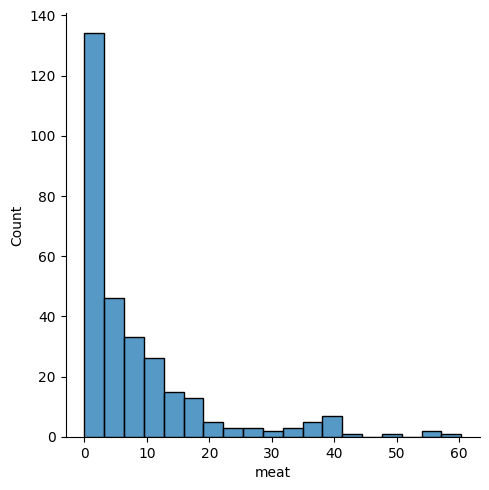

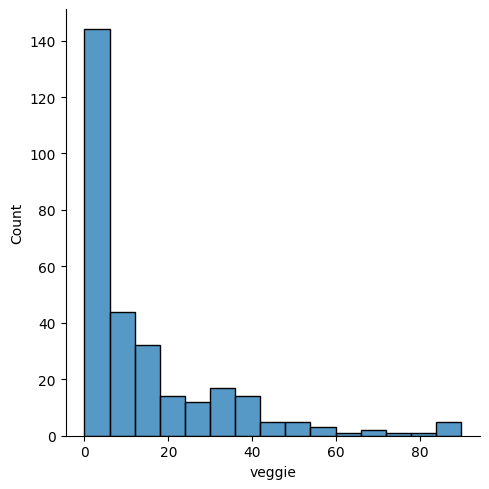

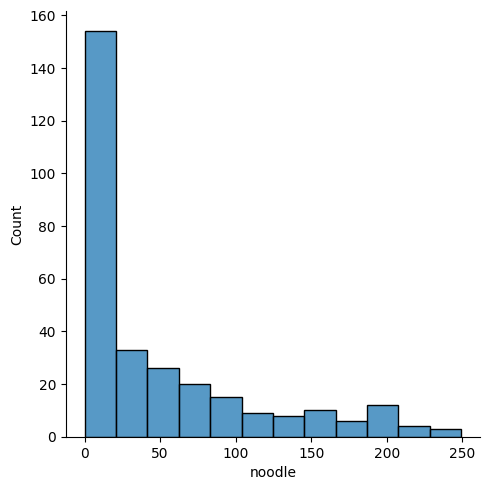

In [15]:
import seaborn as sns

sns.displot(val_set, x="meat")
sns.displot(val_set, x="veggie")
sns.displot(val_set, x="noodle")